<a href="https://colab.research.google.com/github/diazameer/Image-Classification/blob/main/Image_Basics-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Image : Data which contains Pixels
# Pixel : Smallest addressable unit - [Width,Height]
# Types of Images
# 1. Grayscale Image - Width*Height - 2
# 2. Color image - Width*Height*Depth - 3

# Depth - RGB [Red,Green and Blue]

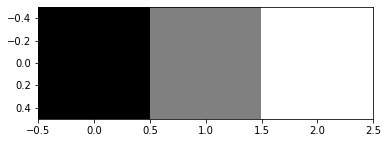

In [2]:
import numpy as np
import matplotlib.pyplot as plt
img = np.array([[1,4,7]])
plt.imshow(img,cmap='gray')
plt.show()

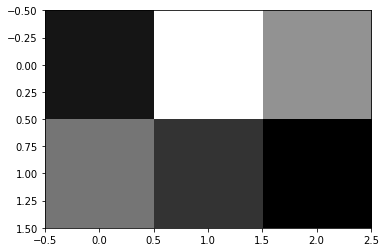

In [3]:
img = np.array([[10,42,27],
                [23,14,7]])
plt.imshow(img,cmap='gray')
plt.show()

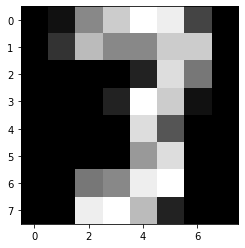

In [4]:
img = np.array([[ 0.,  1.,  8., 12., 15., 14.,  4.,  0.],
                [ 0.,  3., 11.,  8.,  8., 12., 12.,  0.],
                [ 0.,  0.,  0.,  0.,  2., 13.,  7.,  0.],
                [ 0.,  0.,  0.,  2., 15., 12.,  1.,  0.],
                [ 0.,  0.,  0.,  0., 13.,  5.,  0.,  0.],
                [ 0.,  0.,  0.,  0.,  9., 13.,  0.,  0.],
                [ 0.,  0.,  7.,  8., 14., 15.,  0.,  0.],
                [ 0.,  0., 14., 15., 11.,  2.,  0.,  0.]])
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [6]:
img.ndim

2

In [7]:
img.shape

(8, 8)

In [8]:
!wget https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit.jpg -O car.jpg

--2021-04-23 06:51:05--  https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit.jpg
Resolving www.extremetech.com (www.extremetech.com)... 23.67.57.35, 23.67.57.120
Connecting to www.extremetech.com (www.extremetech.com)|23.67.57.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784940 (767K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>] 766.54K  --.-KB/s    in 0.07s   

2021-04-23 06:51:05 (10.8 MB/s) - ‘car.jpg’ saved [784940/784940]



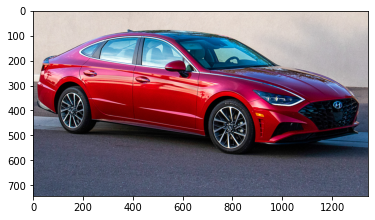

In [9]:
clr_img = plt.imread('car.jpg')
plt.imshow(clr_img)
plt.show()

In [10]:
clr_img

array([[[223, 213, 204],
        [226, 216, 207],
        [227, 214, 206],
        ...,
        [228, 215, 207],
        [236, 223, 215],
        [229, 216, 208]],

       [[228, 218, 209],
        [229, 219, 210],
        [228, 215, 207],
        ...,
        [229, 216, 208],
        [222, 209, 201],
        [218, 205, 197]],

       [[224, 214, 205],
        [221, 211, 202],
        [222, 209, 201],
        ...,
        [224, 211, 203],
        [222, 209, 201],
        [225, 212, 204]],

       ...,

       [[ 52,  68,  91],
        [ 37,  54,  74],
        [ 42,  59,  75],
        ...,
        [ 91,  98, 127],
        [ 94, 104, 131],
        [ 68,  80, 106]],

       [[ 56,  73,  91],
        [ 42,  59,  79],
        [ 53,  69,  92],
        ...,
        [ 73,  83, 110],
        [ 97, 107, 132],
        [ 79,  91, 115]],

       [[ 75,  91, 114],
        [ 63,  79, 104],
        [ 69,  85, 111],
        ...,
        [ 78,  88, 113],
        [ 66,  77,  99],
        [ 67,  78,  98]]

In [11]:
clr_img.shape

(743, 1344, 3)

In [12]:
clr_img.dtype

dtype('uint8')

In [13]:
2**8

# 0 - 255 
# [0-255],[0-255],[0-255]

256

In [14]:
from tensorflow import keras

In [15]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

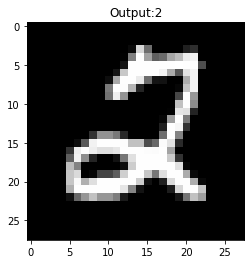

In [18]:
# Displaying Images
import random
import matplotlib.pyplot as plt
i = random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')
plt.title(f'Output:{y_train[i]}')
plt.show()

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [20]:
# Normalization : Scales down to one specific range (0-1)
x_train = x_train/255
x_test = x_test/255

In [21]:
# 1. CNN Architecture
# 2. Compile the model
# 3. Fitting the model(Training)
# 4. Evaluate

In [22]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [24]:
model = keras.Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               512500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [27]:
history = model.fit(x_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 40s 6ms/step - loss: 0.2710 - accuracy: 0.9124 - val_loss: 0.0531 - val_accuracy: 0.9842
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0321 - val_accuracy: 0.9897
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0342 - val_accuracy: 0.9890
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0157 - accuracy: 0.9951 - val_loss: 0.0331 - val_accuracy: 0.9923
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0126 - accuracy: 0.9955 - val_loss: 0.0294 - val_accuracy: 0.9923
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0354 - val_ac

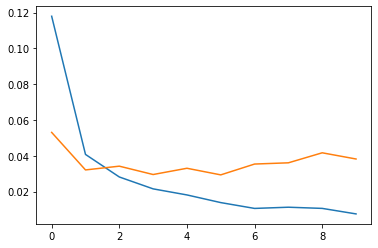

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [30]:
# Evaluation
score =  model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9917


In [31]:
print(score)

[0.027032392099499702, 0.9916999936103821]


In [32]:
predictions = model.predict_classes(x_test)

predictions = list(predictions)
actuals = list(y_test)

import pandas as pd
sub = pd.DataFrame({'Actual':actuals,'Predicted':predictions})
sub

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)

array([[ 977,    0,    0,    0,    0,    1,    3,    0,    2,    0],
       [   0, 1133,    1,    0,    0,    0,    2,    3,    0,    0],
       [   0,    0, 1024,    1,    0,    0,    3,    1,    1,    0],
       [   0,    1,    2,  993,    0,    2,    0,    0,    1,    0],
       [   1,    0,    1,    0,  979,    0,    2,    1,    2,    4],
       [   0,    0,    0,   13,    0,  885,    1,    0,    1,    3],
       [   1,    0,    0,    0,    0,    1,  947,    0,    2,    0],
       [   0,    0,    4,    2,    0,    0,    0, 1019,    0,    4],
       [   0,    0,    0,    1,    0,    2,    0,    1,  963,    1],
       [   1,    1,    0,    0,    3,    1,    0,    3,    2,  997]])

In [36]:
model.save('digit_cnn.hdf5')
# Weights which are trained

In [37]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
!pip install streamlit-drawable-canvas --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.8MB/s 
     |████████████████████████████████| 163kB 37.9MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 112kB 42.9MB/s 
     |████████████████████████████████| 4.2MB 38.0MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 122kB 44.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
     |████████████████████████████████| 1.3MB 5.4MB/s 


In [40]:
%%writefile app.py
import streamlit as st
import numpy as np
from streamlit_drawable_canvas import st_canvas
from tensorflow import keras
import cv2
model = keras.models.load_model('digit_cnn.hdf5',compile=False)

SIZE = 225

col1, col2 = st.beta_columns(2)

with col1:
  st.write('Original Image')
  canvas_result = st_canvas(fill_color='#000000',stroke_width=20,stroke_color='#fcba03',
      background_color='#000000',width=SIZE,height=SIZE,drawing_mode="freedraw")

with col2:
  if canvas_result.image_data is not None:
      img = cv2.resize(canvas_result.image_data.astype('uint8'), (28, 28))
      rescaled = cv2.resize(img, (SIZE, SIZE))
      st.write('Rescaled Image')
      st.image(rescaled)

if st.button('Predict'):
    test_x = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_x.reshape(1,28,28,1)
    val = model.predict(test_x)
    st.title(f'Result: {np.argmax(val[0])}')
    st.bar_chart(val[0])

Overwriting app.py


In [39]:
!nohup streamlit run app.py &

public_url = ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://58fd6611f73c.ngrok.io
